<a href="https://colab.research.google.com/github/leiladanesh/machin-learning/blob/main/KNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n=300

apple_width = np.random.normal(6,1.0,n)
apple_length = np.random.normal(6,1.0,n)

banana_width = np.random.normal(4,1.0,n)
banana_length = np.random.normal(8,1.0,n)

watermelon_width = np.random.normal(12, 1, n)
watermelon_length = np.random.normal(15, 1, n)

In [3]:
width = np.concatenate((apple_width,banana_width,watermelon_width))
length = np.concatenate((apple_length,banana_length,watermelon_length))

width.shape

(900,)

In [4]:
x_width = 3
x_length = 9

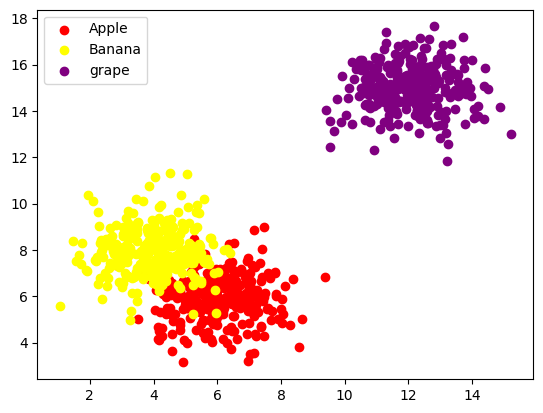

In [23]:
plt.scatter(apple_width,apple_length,c='red')
plt.scatter(banana_width,banana_length,c='yellow')
plt.scatter(watermelon_width,watermelon_length,c='Purple')

plt.legend(['Apple', 'Banana','grape'])
plt.show()

In [ ]:
# KNN: k nearest neighbors

In [6]:
X_train = np.array([width,length]).transpose()

X_train

array([[ 5.09287188,  6.54591206],
       [ 4.59057545,  4.35294623],
       [ 4.4554006 ,  5.38255917],
       ...,
       [13.53873476, 15.24264743],
       [11.37726704, 13.84348841],
       [10.821147  , 15.37256777]])

In [7]:
Y_apples = np.zeros(n,dtype='int')
Y_banana = np.ones(n,dtype='int')
Y_watermelon = np.ones(n,dtype='int')*2

In [8]:
Y_train = np.concatenate((Y_apples,Y_banana,Y_watermelon))

Y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [9]:
def euclidean_distance (x1 , x2) :
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [10]:
new_fruit = np.array([12,11])

distances = []

for x in X_train:
    d = euclidean_distance(new_fruit,x)
    distances.append(d)


distances

[8.218717557138362,
 9.954039178026123,
 9.406201236258026,
 8.871109624494716,
 8.099948747468764,
 8.747682271389397,
 8.028941073686351,
 10.013886800056001,
 8.097970427172738,
 7.672373737042103,
 7.419240634838363,
 8.661127021915167,
 9.21835822905781,
 6.574869181751562,
 10.450192361588167,
 8.72479335031212,
 7.365400771734169,
 8.538994496151178,
 9.716451096568404,
 8.502560502716397,
 7.7667249442469,
 9.193123347756828,
 8.273248358043809,
 6.806446718149703,
 8.687781355084047,
 6.923800620948037,
 8.000662920879922,
 8.276097370763132,
 8.490735857262198,
 9.858638007943924,
 6.750967721153737,
 8.44017659770303,
 9.239843884665532,
 8.668742445185783,
 7.881480080486363,
 7.638425948080243,
 8.995350906644196,
 8.841384230100825,
 9.65044751634884,
 7.992687730635835,
 7.193415644007375,
 6.185031990263325,
 8.532526098654916,
 8.20467495549173,
 8.872853754755237,
 5.968827422945784,
 7.918071581549188,
 9.079643556876608,
 7.317752668632535,
 8.71637516859565,
 5.592

In [12]:
k = 5


In [13]:
np.argsort(distances)[0:k]
nearest_neighbors =np.argsort(distances)[0:k]
Y_train[nearest_neighbors]
result=np.bincount(Y_train[nearest_neighbors])
result

array([0, 0, 5])

In [14]:
np.argmax(result)

2

In [15]:
nearest_neighbors = np.argsort(distances)
nearest_neighbors = nearest_neighbors[0:k]
nearest_neighbors

array([706, 826, 730, 601, 835])

In [16]:
result = Y_train[nearest_neighbors]

In [17]:
result = np.argmax(np.bincount(result))
result

2

In [24]:
if result == 0:
    print('apple')

elif result == 1:
    print('banana')

elif result == 2:
    print('grape')

grape
